In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
master_table = Table.read('master_file_vflag_6.txt', format='ascii.ecsv')

## Isolate eliminated galaxies

In [3]:
eliminated_boolean = np.logical_or(master_table['curve_used'] == 'non', master_table['curve_used'] == 'none')

eliminated_galaxies = master_table[eliminated_boolean]

## Separate by environment

In [4]:
##################################################################
# Eliminated galaxies
#-----------------------------------------------------------------
vboolean = eliminated_galaxies['vflag'] == 1
wboolean = eliminated_galaxies['vflag'] == 0

void_eliminated_galaxies = eliminated_galaxies[vboolean]
wall_eliminated_galaxies = eliminated_galaxies[wboolean]
##################################################################


##################################################################
# All galaxies
#-----------------------------------------------------------------
vboolean = master_table['vflag'] == 1
wboolean = master_table['vflag'] == 0

void_galaxies = master_table[vboolean]
wall_galaxies = master_table[wboolean]
##################################################################

## Bin by absolute magnitude

In [5]:
# Histogram parameters
bins = np.array([0, -17, -18, -19, -20, -26])


# Initialize table to store the number of galaxies in each bin of the histogram(s).
eliminated_count_table = Table()
count_table = Table()


# First column is the bins
eliminated_count_table['Bins'] = bins[1:]
count_table['Bins'] = bins[1:]

# Second column is the number of galaxies in each magnitude bin
eliminated_count_table['All'],_ = np.histogram(np.absolute(eliminated_galaxies['rabsmag']), bins=np.absolute(bins))
count_table['All'],_ = np.histogram(np.absolute(master_table['rabsmag']), bins=np.absolute(bins))

# Third column is the number of void galaxies in each magnitude bin
eliminated_count_table['Void'],_ = np.histogram(np.absolute(void_eliminated_galaxies['rabsmag']), bins=np.absolute(bins))
count_table['Void'],_ = np.histogram(np.absolute(void_galaxies['rabsmag']), bins=np.absolute(bins))

# Fourth column is the number of wall galaxies in each magnitude bin
eliminated_count_table['Wall'],_ = np.histogram(np.absolute(wall_eliminated_galaxies['rabsmag']), bins=np.absolute(bins))
count_table['Wall'],_ = np.histogram(np.absolute(wall_galaxies['rabsmag']), bins=np.absolute(bins))

## Save table

In [25]:
eliminated_count_table.write('eliminated_gal_stats.txt', format='ascii.commented_header')

## Comparisons

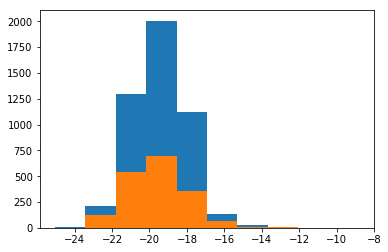

In [12]:
plt.figure()
plt.hist(master_table['rabsmag'])
plt.hist(eliminated_galaxies['rabsmag'])
plt.show()

In [8]:
print(count_table['Bins'], eliminated_count_table['All']/count_table['All'])
print(eliminated_count_table['Void']/count_table['Void'])
print(eliminated_count_table['Wall']/count_table['Wall'])

Bins
----
 -17
 -18
 -19
 -20
 -26         All        
-------------------
 0.4517766497461929
0.31166347992351817
0.32413793103448274
 0.3517465475223396
0.43838028169014087
        Void       
-------------------
0.45161290322580644
 0.2847682119205298
0.31486880466472306
 0.3481675392670157
0.41595441595441596
        Wall       
-------------------
 0.5476190476190477
              0.325
0.34186046511627904
 0.3598233995584989
 0.4610951008645533


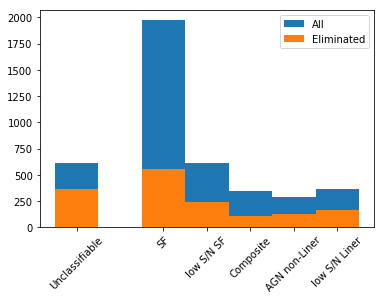

In [21]:
bin_edges = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
bin_values = [-1, 1, 2, 3, 4, 5]
bin_labels = ['Unclassifiable', 'SF', 'low S/N SF', 'Composite', 'AGN non-Liner', 'low S/N Liner']

plt.figure()
plt.hist(master_table['BPT'], bins=bin_edges, label='All')
plt.hist(eliminated_galaxies['BPT'], bins=bin_edges, label='Eliminated')
plt.xticks(bin_values, bin_labels, rotation=45)
plt.legend()
plt.show()